In [1]:
%matplotlib inline

In [2]:
# my imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Predicting Book Sales Success through Sentiment Analysis of Online Reviews

### Abstract
&nbsp;&nbsp;&nbsp;&nbsp;This project aims to asses the possibility of prediction of sales success of books based on sentiment analysis of online comments and reviews. By analyzing the sentiment expressed in user-generated content, we can gain insights into the public perception and potential market performance of various books. The project will utilize natural language processing (NLP) techniques to extract sentiment scores from comments and reviews, which will then be compared with existing sales data in attempt to predict future success of book sales. This approach can help publishers, authors, and retailers make data-driven decisions about marketing strategies, inventory management, and future publications.

1. Introduction

&nbsp;&nbsp;&nbsp;&nbsp;Understanding public sentiment can provide valuable insights into market trends and consumer preferences, aiding in strategic decision-making for stakeholders in the publishing industry. 
The objective of this project is to predict book sales success using sentiment analysis of online comments and reviews. The sentiment analysis will be performed on one of the following scikit-learn models: Logistic Regression, Naive Bayes, Support Vector Machines (SVM). All three models will be tested on an annotated book review dataset and the best performing will be chosen based on the following metrics: Precision, Recall, F1-Score, Support and Accuracy. The best performing model will be used to classify a second book review dataset based on the review's sentiment. The last step will compare the results of the sentiment predictions with the actual data represented by a list of best-selling books. Based on that comparison a conclusion will be made on the feasibility of a book success prediction based on a sample of book reviews.

&nbsp;&nbsp;&nbsp;&nbsp;In attempt to achieve this three separate datasets will be used: 
- Goodreads list of top 100 science fiction books of all time (Trrishan, 2021; Top 100 Science Fiction Books and their Reviews)
- Amazon Top 100 Bestselling Book Reviews on Amazon for predicting (nsh Tanwar, 2023; Top 100 Bestselling Book Reviews on Amazon)
- List of best-selling books (Wikipedia) (Wikipedia, 2024; List of best-selling books)



2. Literature Review

&nbsp;&nbsp;&nbsp;&nbsp;A numerous attempts have been made in the past to link the results of a public opinion sentiments and the marketing success of a product. There have been multiple attempts on predicting the final box office success of a move based on the Rotten Tomato review scores or IMDB review ratings. With the vast influence in modern live of social media, efforts have been made to extract the sentiment (positive or negative) from customer reviews in X, Facebook and other social media, in order to predict future sales success.
In order to conduct the sentiment analysis, the following Natural Language Processing techniques are usually used: 
- Deep Learning Algorithms - mainly used on large datasets, Deep Learning Models, including artificial neural networks usually provide the best results for sentiment analysis. DLM's, however required a large amount of data to train in order to provide best accuracy. Some common deep-learning methods are:

    - Convolutional Neural Networks (CNN)
    - Recurrent Neural Networks (RNN)
    - Deep Belief Networks (DBN)
    - Long-Short Term Memory (LSTM)

- Supervised Machine Learning Algorithm - in supervised machine learning, the data is usually manually annotated before the preprocessing and is used for training the model. These models can be used to predict and classify future unannotated texts. Such methods are considered more accurate than the semi-supervised and unsupervised methods, however, the accuracy depends on the quality of the annotations. Some of the supervised machine learning algorithms are:
    - Support Vector Machines (SVM)
    - Naive Bayes (NB)
    - Logistic Regression (LogR)
    - Maximum Entropy (ME)
    - K-Nearest Neighbor (kNN)
    - Random Forest (RF)
    - Decision Trees (DT)
&nbsp;&nbsp;&nbsp;&nbsp;This work will focuse on Logistic Regression (LogR), Support Vector Machines (SVM) and Naive Bayes (NB) algorythms.

- Unsupervised and semi-supervised learning - the semi-supervised uses both labeled and unlabeled data and requires less human interaction. Unlabeled data assists in extracting language-invariant features, while labeled data is utilized as a classifier (6 Approaches for Sentiment Analysis Machine Learning in 2024.). 
Unsupervised learning uses lexicon-based approach using predifined dictionaries. The unsupervised approach does not need a trainig data and makes the predictions based on the word paring, popular terms and their positive, negative or neutral meanings. 

&nbsp;&nbsp;&nbsp;&nbsp;Both semi-supervised and unsupervised approaches predictions are heavily affected by the following language specifics:
- Negations - changing the entire meaning of the text, for example 'I wouldn't say: this is priceless' can sometimes be interpreted as a positive because of the heavy sentiment value of the word 'pricesless' and not considering that the emotional value is exactly the oposite. 
- Irony - the majority of machine learning algorithms are unable to distinquish irony.
- Alegory, analogy and metaphors - popular sayings like "Break a leg!" can be wrongly interpreted as a negative sentiment based on the heavy negative weight of the word 'to break' and completely miss the actual meaning of 'Good luck!'. 
- Bias - mainly affects unsupervised learning algorythms that use lexicon-based approach, which can be outdated or otherways biased.

3. Data Collection

&nbsp;&nbsp;&nbsp;&nbsp;For this project the data was aquired from relevant sources such as Amazon, Goodreads. The datasets used for training the model and for sentiment classification were gathered from Kaggle:
- Goodreads list of top 100 science fiction books of all time. Due to it's larger size and better sentiment distribution this dataset was chosen for training of the model.
- Amazon Top 100 Bestselling Book Reviews on Amazon for predicting of sales success.
&nbsp;&nbsp;&nbsp;&nbsp;Prior model training and sentyment analysis the following data preprocessing was applied: clean and preprocess the data, including text normalization, tokenization, and removal of irrelevant information. The preprocessing code and resulting files are listed in the Apendices section of this work.<br>
&nbsp;&nbsp;&nbsp;&nbsp;The data used for Sales analysis and success prediction check was scraped from Wikipedia:
- List of best-selling books (Wikipedia)

In [3]:
good_reads_df = pd.read_csv('data/cleaned_reviews_for_training_scifi.csv')

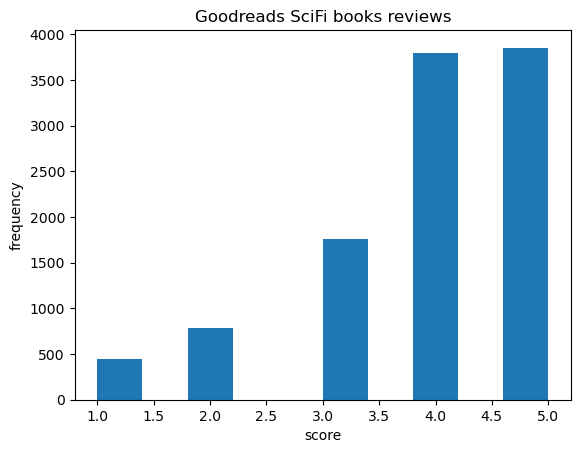

In [4]:
plt.hist(good_reads_df.stars_given)
plt.title('Goodreads SciFi books reviews')
plt.xlabel('score')
plt.ylabel('frequency')
plt.show()

In [5]:
amazon_df = pd.read_csv('data\cleaned_reviews_for_training_various.csv')

In [6]:
amazon_df.columns

Index(['#', 'book_name', 'reviewer_anonymous', 'reviewer_rating',
       'review_description', 'date', 'cleaned_review'],
      dtype='object')

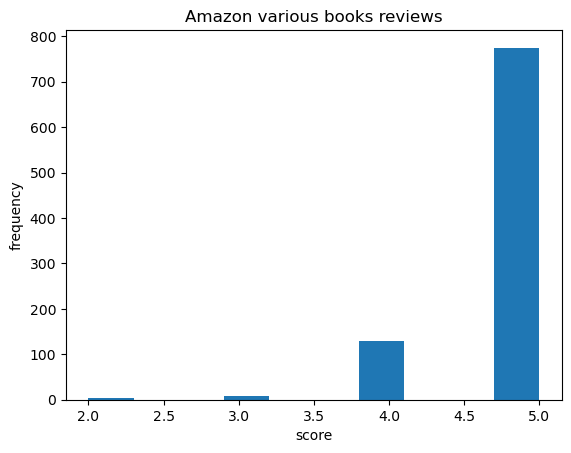

In [7]:
plt.hist(amazon_df.reviewer_rating)
plt.title('Amazon various books reviews')
plt.xlabel('score')
plt.ylabel('frequency')
plt.show()

4. Sentiment Analysis<br>

&nbsp;&nbsp;&nbsp;&nbsp;In order to prepare the dataset for training the model and the dataset used for sales success prediction the following steps were taken using the Natural Language Toolkit library (NLTK):
    1. Normalization - Convert all text to lowercase to ensure uniformity.
    2. Removal of stop words - Remove common words (like "the", "is", "in") that don't carry    significant meaning.
    3. Lemmatization - Reduce words to their base form.
    4. Tokenization - Split the text into individual words (tokens).
    5. Removing punctuation - Remove punctuation marks from the text.
 <br>

&nbsp;&nbsp;&nbsp;&nbsp;Detailed description and execution of the data cleaning and preprocess can be found in the following Jupyter Notebook instances: 
- 'clean_and_tidy_reviews_for_scifi_books.ipynb'
- 'clean_and_tidy_reviews_for_various.ipynb'

&nbsp;&nbsp;&nbsp;&nbsp;The dataset used for the sales analysis was scraped using Beutiful Soup (BS4) library, the process of scraping, tidying and preprocessing can be found in the following Jupyter Notebook:
- 'web_scraper_bestsellers_books.ipynb'
    
&nbsp;&nbsp;&nbsp;&nbsp;Sentiment extraction was implemented on the SciFi detaset using three of the more popular Machine Learning models used in sentiment analysis: Logistic Regression (LogR), Support Vector Machines (SVM) and Naive Bayes (NB) algorythms. The process is described in the following Jupyter Notebook instances:     
- 'basic_sentiment_analysis_sklearn_logistic_regression.ipynb',   
- 'basic_sentiment_analysis_sklearn_naive_bayes.ipynb', 
- 'basic_sentiment_analysis_sklearn_svm.ipynb'

&nbsp;&nbsp;&nbsp;&nbsp;Feature Engineering and Transformation of sentiment scores and other textual features into numerical features suitable for predictive modeling was done using TF-IDF (Term Frequency - Inverse Document Frequency) method with scikit-learn method TfidfVectorizer().

&nbsp;&nbsp;&nbsp;&nbsp;The following metrics were considered while assesing the models performance:
- Precision: The ratio of correctly predicted positive observations to the total predicted positives. High precision indicates fewer false positives.
- Recall: The ratio of correctly predicted positive observations to all actual positives. High recall indicates fewer false negatives.
- F1-Score: The weighted average of precision and recall. It provides a balance between precision and recall.
- Support: The number of true instances for each label.
- Accuracy: The set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

### Logistic Regression score:
![Alt Text](media\logistic_regression_results_preprocessed.png)

### Naive Bayes score:
![Alt Text](media\naive_bayes_results_preprocessed.png)

### Support Vector Machine score:
![Alt Text](media\svm_results_preprocessed.png)

In [8]:
accuracy_score_dict = {'models': ['LR', 'NB', 'SVM'],
                        'accuracy_score': [0.7571764705882353, 0.723764705882353, 0.7811764705882352]}

acc_df = pd.DataFrame(accuracy_score_dict)

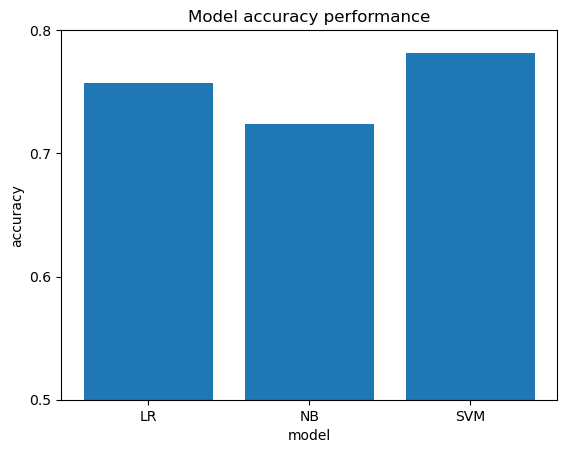

In [29]:
plt.bar(acc_df.models, acc_df.accuracy_score)
plt.title('Model accuracy performance')
plt.xlabel('model')
plt.ylabel('accuracy')
plt.yticks([0.5, 0.6, 0.7, 0.8])
plt.ylim(0.5, 0.8)
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;During the selection process the time to train the model was taken into consideration as well:

In [10]:
time_to_train_seconds_dict = {'models': ['LR', 'NB', 'SVM'],
                        'ttt_seconds': [14.7, 7.1, 148]}

ttt_df = pd.DataFrame(time_to_train_seconds_dict)

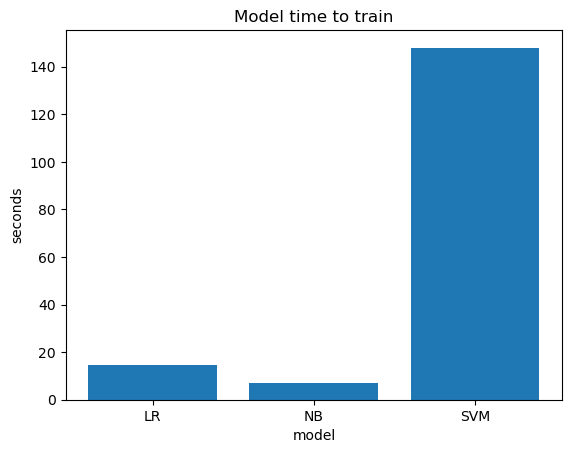

In [30]:
plt.bar(ttt_df.models, ttt_df.ttt_seconds)
plt.title('Model time to train')
plt.xlabel('model')
plt.ylabel('seconds')
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;Regardless of the significantly longer time to train, the SVM was chosen due to the better accuracy score and the relatively small training and prediction datasets. The training and data extraction for Sales analysis can be reviewed in the 'basic_sentiment_analysis_sklearn_svm.ipynb' Jupyter Notebook.

5. Sales Analysis and Sales Success Prediction

&nbsp;&nbsp;&nbsp;&nbsp;Sales analysis was made using the Wikipedia List of best-selling books. The data was scraped from the Wikipedia page using Beutiful Soup library. The reason for using Wikipedia was that this was the only comprehensive source of sales data available. This is discussed in more detail in 7. Discussion and 8. Conclusion sections of this paper. The sales analysis and prediction for sales success can be found in 'sales_analysis_and_prediction.ipynb' Jupyter Notebook.

In [12]:
sales_df = pd.read_csv('data/sales_success_data.csv')

In [14]:
sales_df.shape

(91, 7)

In [15]:
sales_df.head()

,Unnamed: 0,book_name,positive_count,total_count,positive_percentage,normalized_title,is_successful
0,0,A Court of Mist and Fury (A Court of Thorns an...,10,10,100.0,a court of mist and fury,False
1,1,A Court of Thorns and Roses (A Court of Thorns...,8,10,80.0,a court of thorns and roses,False
2,2,A Court of Thorns and Roses Paperback Box Set ...,10,10,100.0,a court of thorns and roses paperback box set,False
3,3,A Court of Wings and Ruin (A Court of Thorns a...,9,10,90.0,a court of wings and ruin,False
4,4,A Little Life,10,10,100.0,a little life,False


The split by percentage share of positive sentiment

In [16]:
sales_df.positive_percentage.value_counts()

positive_percentage
100.0    81
90.0      8
80.0      2
Name: count, dtype: int64

When compared with the list of bestselers, only two books are present in both lists:

In [17]:
sales_df.is_successful.value_counts()

is_successful
False    89
True      2
Name: count, dtype: int64

In [18]:
sales_df[sales_df.is_successful]

,Unnamed: 0,book_name,positive_count,total_count,positive_percentage,normalized_title,is_successful
24,24,Harry Potter and the Prisoner of Azkaban (Harr...,10,10,100.0,harry potter and the prisoner of azkaban,True
78,78,The Very Hungry Caterpillar,10,10,100.0,the very hungry caterpillar,True


The split by percentage share of positive sentiment shows that even on 100% positive comments there are books that are not in the bestsellers list:

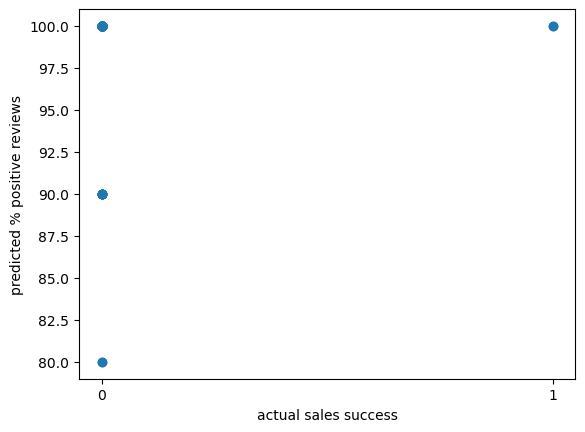

In [24]:
plt.scatter(sales_df.is_successful, sales_df.positive_percentage)
plt.xlabel('actual sales success')
plt.ylabel('predicted % positive reviews')
plt.xticks([True, False])
plt.show()

In [28]:
sales_df[(sales_df.positive_percentage == 100) &
         (sales_df.total_count >= 10)].is_successful.value_counts()

is_successful
False    78
True      2
Name: count, dtype: int64

6. Results and Analysis

&nbsp;&nbsp;&nbsp;&nbsp;The sentiment analysis prediction performed adequately on the reviews dataset with 97.38 % accuracy. The process and results can be observed in 'basic_sentiment_analysis_sklearn_svm.ipynb' Jupyter notebook.<br>
&nbsp;&nbsp;&nbsp;&nbsp;The sales analysis based on the Wikipedia bestsellers list showed that the successful books (books that sold more than 10 million copies) have 100% positive responses rate, and at least 10 reviews. However the dataset used for prediction has 80 books with 10 or more comments and 100% positive responses rate out of which only 2 are part of the successful books list: "Harry Potter and the Prisoner of Azkaban" and "The Very Hungry Caterpillar". These results show that with the available data it is impossible to predict if a book will be a bestseller based solely on customer reviews.


7. Discussion

&nbsp;&nbsp;&nbsp;&nbsp;The current project had numerous limitations which prevent a conclusive outcome. Primerely there is a very limited source of trainig data. Although the model showed successful predictions of ~97% on the annotated dataset from Amazon, it is unclear if the model will perform as well on a larger dataset.<br>
&nbsp;&nbsp;&nbsp;&nbsp;There are scaresly any publicly available sales data that can be used to perform a comprehensive sales analysis. The Wikipedia list of best selling books was the only comprehensive sales data split by book title, however the source of the data is not clear and the list can only be used as a approximation of what a successful book is (e.g. more than 10 million copies sold). <br>
&nbsp;&nbsp;&nbsp;&nbsp;The reason for the lack of public data is addressed in the following "there are no published resources which track sales figures for individual book titles. Magazines and periodicals that publish weekly bestseller lists (e.g. "Publisher's Weekly," newspaper literary supplements) will sometimes include sales figures for items which appear on the list."(Frequently Asked Questions: History, Humanities & Social Sciences: Can you tell me how many copies of a book were sold or printed?).  This is also addressed by Harvard Library: "Strange as it may seem, we know of no reliable, publicly-available way to get comprehensive statistics for book sales at this time.  The only database with reasonably accurate information is Nielsen BookScan, which reports point-of-sale data, but even that claims to represent only 75% of all retail sales.  BookScan is a comparatively recent (2005), very expensive subscription service, used primarily in the industry.  Harvard does not have a subscription." 

&nbsp;&nbsp;&nbsp;&nbsp;Given the availability of better data, in future projects it might be possible to make sales success prediction based on consumer reviews.<br>
&nbsp;&nbsp;&nbsp;&nbsp;A better prediction rate for sentiment analysis can be achieved by the use of neural networks model such as BERT and this can be the subject of a future project.

8. Conclusion

&nbsp;&nbsp;&nbsp;&nbsp;This project aimed to explore the potential of predicting the sales success of books by analyzing the sentiment expressed in online comments and reviews. The core objective was to determine whether sentiment analysis, performed using machine learning models like Logistic Regression, Naive Bayes, and Support Vector Machines (SVM), could reliably predict book sales success. Three datasets were used: a Goodreads list of top 100 science fiction books, Amazon's Top 100 Bestselling Book Reviews, and a Wikipedia list of best-selling books. The models were evaluated based on Precision, Recall, F1-Score, Support, and Accuracy, with the best performing model (SVM) being used for prediction. Despite achieving a high accuracy of 97.38% on the Amazon review dataset, the sentiment analysis could not conclusively predict bestsellers when compared against the Wikipedia list, as only two of the predicted successful books appeared on the bestseller list.<br>
&nbsp;&nbsp;&nbsp;&nbsp;The findings have several practical implications for publishers, authors, and retailers. While sentiment analysis can provide valuable insights into consumer attitudes, it alone may not be sufficient to predict a book’s commercial success. Publishers and authors can use sentiment analysis to gauge public reception and identify potential market trends, but it should be combined with other data sources and metrics for more accurate forecasting. Retailers could use sentiment scores to inform inventory decisions and marketing strategies but should be cautious about relying solely on this method to predict sales.<br>
&nbsp;&nbsp;&nbsp;&nbsp;This project contributes to the field of data science and sentiment analysis by highlighting both the potential and the limitations of using sentiment analysis for predicting book sales. The project demonstrated the effectiveness of traditional machine learning models in classifying sentiment, but also underscored the challenges of using these models for sales prediction due to data limitations. The findings suggest that while sentiment analysis is a valuable tool for understanding consumer behavior, it needs to be integrated with richer data and more sophisticated models, such as neural networks like BERT, to enhance its predictive power. This project lays the groundwork for future research in this area, with the potential for more accurate sales predictions given better data and advanced modeling techniques.



9. References

Datasets:
* Ansh Tanwar, 2023; Top 100 Bestselling Book Reviews on Amazon. Available at:  https://www.kaggle.com/datasets/anshtanwar/top-200-trending-books-with-reviews/data (Accessed: 10 August 2024)

* Trrishan, 2021; Top 100 Science Fiction Books and their Reviews. Available at: https://www.kaggle.com/datasets/notkrishna/top-100-science-fiction-books-and-their-reviews (Accessed: 10 August 2024)

* Wikipedia, 2024; List of best-selling books. Available at: https://en.wikipedia.org/wiki/List_of_best-selling_books (Accessed: 10 August 2024)


Articles:
* Cem Dilmegani, Ezgi Alp, PhD., 2024; 6 Approaches for Sentiment Analysis Machine Learning in 2024. Available at:
https://research.aimultiple.com/sentiment-analysis-machine-learning/ (Accessed: 17 August 2024)

* US Library of congress, 2023; Frequently Asked Questions: History, Humanities & Social Sciences: Can you tell me how many copies of a book were sold or printed? Available at:
https://ask.loc.gov/history-humanities-social-sciences/faq/383956 (Accessed: 18 August 2024)

* Harvard Library, 2005; Where can I find detailed book sales figures or statistics? Available at: https://ask.library.harvard.edu/faq/81944 (Accessed: 18 August 2024)

* SciKit-Learn, Getting Started. Available at: https://scikit-learn.org/stable/getting_started.html (Accessed: 10 August 2024)

* Natural Language Toolkit - NLTK. Available at: https://www.nltk.org/ (Accessed: 10 August 2024)

10. Appendices



Jupyter notebooks for scraping, data cleaning and tidying:

* web_scraper_bestsellers_books.ipynb - web scraping and cleaning of Wikipedia, 2024; List of best-selling books
* clean_and_tidy_reviews_for_scifi_books.ipynb - data cleaning and tidying of dataset used for model training Trrishan, 2021; Top 100 Science Fiction Books and their Reviews
* clean_and_tidy_reviews_for_various.ipynb - data cleaning and tidying of dataset used for sentiment prediction and sales analysis Ansh Tanwar, 2023; Top 100 Bestselling Book Reviews on Amazon
* basic_sentiment_analysis_sklearn_logistic_regression.ipynb - building and testing Logistic regression model
* basic_sentiment_analysis_sklearn_naive_bayes.ipynb - building and testing Naive Bayes model
* basic_sentiment_analysis_sklearn_svm.ipynb - building and testing Naive Bayes model, implementing prediction using the cleaned Top 100 Bestselling Book Reviews on Amazon dataset
* sales_analysis_and_prediction.ipynb - analysis of Wikipedia, 2024; List of best-selling books and Top 100 Bestselling Book Reviews on Amazon and sales success prediction

Model testing metrics results:
* "media\logistic_regression_results_preprocessed.png"
* "media\naive_bayes_results_preprocessed.png"
* "media\svm_results_preprocessed.png"